# Competição do Kaggle para previsão de receita de filmes

In [41]:
#Bibliotecas para manipulação de dados e machine learning

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import ast
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Analisar Investimento, Linguagem, Gênero, Popularidade, Produtora, Linguagem.

In [42]:
#Importando datasets em variáveis

treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

colunas = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def aux(df):
    for coluna in colunas:
        df[coluna] = df[coluna].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df
        
treino = aux(treino)
teste = aux(teste)

### Limpeza,interpretação e organização dos dados

In [43]:
#Vendo tamanho dos dataframes
print("Tamanho treino ",treino.shape)
print("Tamanho teste: ",teste.shape)

Tamanho treino  (3000, 23)
Tamanho teste:  (4398, 22)


In [44]:
#Visualização do treino
treino.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [45]:
#Descrição do treino
treino.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [46]:
#Limpando colunas que não serão usadas do treino e mudando o nome do resto
treino = treino.drop(columns='homepage') 
treino = treino.drop(columns=['imdb_id']) 
treino = treino.drop(columns=['overview']) 
treino = treino.drop(columns=['release_date']) 
treino = treino.drop(columns=['status']) 
treino = treino.drop(columns=['tagline']) 
treino = treino.drop(columns=['Keywords']) 
treino = treino.drop(columns=['cast'])
treino = treino.drop(columns=['crew']) 
treino = treino.drop(columns=['poster_path']) 
treino = treino.drop(columns=['production_countries']) 

treino = treino.rename(columns={'belongs_to_collection': 'Coleção','budget': 'Orçamento', 'genres': 'Gênero', 'original_language': 'Linguagem_Original', 
                                'original_title': 'Titulo_Original',  'popularity': 'Popularidade',  'production_companies': 'Produtora',  'runtime': 'Tempo',  'spoken_languages': 'Linguagem_Falada',
                                'title': 'Titulo','revenue': 'Bilheteria'})
treino.head()                                

,id,Coleção,Orçamento,Gênero,Linguagem_Original,Titulo_Original,Popularidade,Produtora,Tempo,Linguagem_Falada,Titulo,Bilheteria
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,3.174936,{},122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,1.148070,{},118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,3923970


In [47]:
#Corrigindo a coluna de tempo
treino['Tempo'] = treino['Tempo'].fillna(0)
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3000 non-null   int64  
 1   Coleção             3000 non-null   object 
 2   Orçamento           3000 non-null   int64  
 3   Gênero              3000 non-null   object 
 4   Linguagem_Original  3000 non-null   object 
 5   Titulo_Original     3000 non-null   object 
 6   Popularidade        3000 non-null   float64
 7   Produtora           3000 non-null   object 
 8   Tempo               3000 non-null   float64
 9   Linguagem_Falada    3000 non-null   object 
 10  Titulo              3000 non-null   object 
 11  Bilheteria          3000 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 281.4+ KB


In [48]:
#Visualizando a coluna de gênero
for i, e in enumerate(treino['Gênero'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [49]:
#Pegando todos os Gêneros e colocando em uma lista
listagenero = list(treino['Gênero'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
#listagenero[:5] -------- Mostra os 5 primeros componetes da lista
Counter([i for j in listagenero for i in j]).most_common() #Contagem dos gêneros

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [50]:
#Inserindo a coluna Gênero com os principais gêneros de cada filme
dfgenero = pd.DataFrame(listagenero, columns=['Gênero','','','','','',''])
treino = treino.drop(columns=["Gênero"])
treino.insert(4,"Gênero",dfgenero['Gênero'],True)
treino.head()

,id,Coleção,Orçamento,Linguagem_Original,Gênero,Titulo_Original,Popularidade,Produtora,Tempo,Linguagem_Falada,Titulo,Bilheteria
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,en,Comedy,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,en,Comedy,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,95149435
2,3,{},3300000,en,Drama,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,13092000
3,4,{},1200000,hi,Thriller,Kahaani,3.174936,{},122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,16000000
4,5,{},0,ko,Action,마린보이,1.148070,{},118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,3923970


In [51]:
#Olhando a coluna Produtora
for i, e in enumerate(treino['Produtora'][:10]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}
5 {}
6 [{'name': 'Ghost House Pictures', 'id': 768}, {'name': 'North Box Productions', 'id': 22637}]
7 {}
8 [{'name': 'Walt Disney Pictures', 'id': 2}, {'name': 'Jim Henson Productions', 'id': 2504}, {'name': 'Jim Henson Company, The', 'id': 6254}]
9 [{'name': 'Castle Rock Entertainment', 'id': 97}]


In [52]:
#Pegando todas as Produtoras e colocando em uma lista
listaprod = list(treino['Produtora'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
#listaprod[:5] -------- Mostra os 5 primeros componetes da lista
#Counter([i for j in listaprod for i in j]).most_common() #Contagem, deixando comentado por ser muito grande
#len(listaprod)

In [53]:
#Inserindo a coluna Produtora
dfprodutora = pd.DataFrame(listaprod, columns=['Produtora','','','','','','','','','','','','','','','',''])
treino = treino.drop(columns=["Produtora"])
treino.insert(8,"Produtora",dfprodutora['Produtora'],True)
treino.head()

,id,Coleção,Orçamento,Linguagem_Original,Gênero,Titulo_Original,Popularidade,Tempo,Produtora,Linguagem_Falada,Titulo,Bilheteria
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,en,Comedy,Hot Tub Time Machine 2,6.575393,93.0,Paramount Pictures,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,en,Comedy,The Princess Diaries 2: Royal Engagement,8.248895,113.0,Walt Disney Pictures,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,95149435
2,3,{},3300000,en,Drama,Whiplash,64.299990,105.0,Bold Films,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,13092000
3,4,{},1200000,hi,Thriller,Kahaani,3.174936,122.0,None,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,16000000
4,5,{},0,ko,Action,마린보이,1.148070,118.0,None,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,3923970


In [54]:
#Visualização do teste
teste.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,{},88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,{},0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,{},6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,{},2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [55]:
#Descrição do teste
teste.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [56]:
#Limpando colunas que não serão usadas do teste e mudando o nome do resto
teste = teste.drop(columns='homepage') 
teste = teste.drop(columns=['imdb_id']) 
teste = teste.drop(columns=['overview']) 
teste = teste.drop(columns=['release_date']) 
teste = teste.drop(columns=['status']) 
teste = teste.drop(columns=['tagline']) 
teste = teste.drop(columns=['Keywords']) 
teste = teste.drop(columns=['cast'])
teste = teste.drop(columns=['crew']) 
teste = teste.drop(columns=['poster_path']) 
teste = teste.drop(columns=['production_countries']) 

teste = teste.rename(columns={'belongs_to_collection': 'Coleção','budget': 'Orçamento', 'genres': 'Gênero', 'original_language': 'Linguagem_Original', 
                                'original_title': 'Titulo_Original',  'popularity': 'Popularidade',  'production_companies': 'Produtora',  'runtime': 'Tempo',  'spoken_languages': 'Linguagem_Falada',
                                'title': 'Titulo'})
teste.head()   

,id,Coleção,Orçamento,Gênero,Linguagem_Original,Titulo_Original,Popularidade,Produtora,Tempo,Linguagem_Falada,Titulo
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",ja,ディアルガVSパルキアVSダークライ,3.851534,{},90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pokémon: The Rise of Darkrai
1,3002,{},88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,Attack of the 50 Foot Woman,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...",65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Attack of the 50 Foot Woman
2,3003,{},0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,Addicted to Love,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Addicted to Love
3,3004,{},6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",fr,Incendies,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...",130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Incendies
4,3005,{},2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",en,Inside Deep Throat,3.217680,{},92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Inside Deep Throat


In [57]:
#Corrigindo a coluna de tempo
teste['Tempo'] = teste['Tempo'].fillna(0)
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4398 non-null   int64  
 1   Coleção             4398 non-null   object 
 2   Orçamento           4398 non-null   int64  
 3   Gênero              4398 non-null   object 
 4   Linguagem_Original  4398 non-null   object 
 5   Titulo_Original     4398 non-null   object 
 6   Popularidade        4398 non-null   float64
 7   Produtora           4398 non-null   object 
 8   Tempo               4398 non-null   float64
 9   Linguagem_Falada    4398 non-null   object 
 10  Titulo              4395 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 378.1+ KB


In [58]:
#Visualizando a coluna de gênero
for i, e in enumerate(teste['Gênero'][:5]):
    print(i, e)

0 [{'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]
1 [{'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}]
2 [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
3 [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'name': 'War'}, {'id': 9648, 'name': 'Mystery'}]
4 [{'id': 36, 'name': 'History'}, {'id': 99, 'name': 'Documentary'}]


In [59]:
#Pegando todos os Gêneros e colocando em uma lista
listagenero2 = list(teste['Gênero'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
#listagenero2[:5] -------- Mostra os 5 primeros componetes da lista
Counter([i for j in listagenero2 for i in j]).most_common() #Contagem dos gêneros

[('Drama', 2145),
 ('Comedy', 1577),
 ('Thriller', 1080),
 ('Action', 994),
 ('Romance', 864),
 ('Adventure', 677),
 ('Crime', 615),
 ('Science Fiction', 454),
 ('Horror', 434),
 ('Family', 415),
 ('Fantasy', 396),
 ('Mystery', 325),
 ('Animation', 241),
 ('Music', 167),
 ('History', 163),
 ('War', 143),
 ('Documentary', 134),
 ('Western', 74),
 ('Foreign', 53)]

In [60]:
#Inserindo a coluna Gênero
dfgenero2 = pd.DataFrame(listagenero2, columns=['Gênero','','','','','','',''])
teste = teste.drop(columns=["Gênero"])
teste.insert(4,"Gênero",dfgenero2['Gênero'],True)
teste.head()

,id,Coleção,Orçamento,Linguagem_Original,Gênero,Titulo_Original,Popularidade,Produtora,Tempo,Linguagem_Falada,Titulo
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,ja,Adventure,ディアルガVSパルキアVSダークライ,3.851534,{},90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pokémon: The Rise of Darkrai
1,3002,{},88000,en,Horror,Attack of the 50 Foot Woman,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...",65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Attack of the 50 Foot Woman
2,3003,{},0,en,Comedy,Addicted to Love,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Addicted to Love
3,3004,{},6800000,fr,Drama,Incendies,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...",130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Incendies
4,3005,{},2000000,en,History,Inside Deep Throat,3.217680,{},92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Inside Deep Throat


In [61]:
#Olhando a coluna Produtora
for i, e in enumerate(teste['Produtora'][:10]):
    print(i, e)

0 {}
1 [{'name': 'Woolner Brothers Pictures Inc.', 'id': 9233}]
2 [{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Outlaw Productions (I)', 'id': 19507}, {'name': 'Miramax', 'id': 53009}]
3 [{'name': 'TS Productions', 'id': 313}, {'name': 'Micro scope', 'id': 7272}, {'name': 'Phi Group', 'id': 7273}]
4 {}
5 [{'name': 'Castle Rock Entertainment', 'id': 97}, {'name': 'Detour Filmproduction', 'id': 11510}]
6 [{'name': 'X-Filme Creative Pool', 'id': 1972}, {'name': 'ARTE', 'id': 5766}, {'name': 'Westdeutscher Rundfunk (WDR)', 'id': 7025}, {'name': 'ARD Degeto Film', 'id': 10947}]
7 [{'name': 'Walt Disney Pictures', 'id': 2}]
8 [{'name': 'Ecosse Films', 'id': 1267}, {'name': '2 Entertain', 'id': 2689}, {'name': 'Bueprint Pictures', 'id': 6342}]
9 [{'name': 'Pixar Animation Studios', 'id': 3}]


In [62]:
#Pegando todas as Produtoras e colocando em uma lista
listaprod2 = list(teste['Produtora'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
#listaprod2[:5] -------- Mostra os 5 primeros componetes da lista
#Counter([i for j in listaprod2 for i in j]).most_common() #Contagem, deixando comentado por ser muito grande
#len(listaprod2)

In [63]:
#Inserindo a coluna Produtora
dfprodutora2 = pd.DataFrame(listaprod2, columns=['Produtora','','','','','','','','','','','','','','','','','','','','','','','','',''])
teste = teste.drop(columns=["Produtora"])
teste.insert(8,"Produtora",dfprodutora2['Produtora'],True)
teste.head()

,id,Coleção,Orçamento,Linguagem_Original,Gênero,Titulo_Original,Popularidade,Tempo,Produtora,Linguagem_Falada,Titulo
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,ja,Adventure,ディアルガVSパルキアVSダークライ,3.851534,90.0,None,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pokémon: The Rise of Darkrai
1,3002,{},88000,en,Horror,Attack of the 50 Foot Woman,3.559789,65.0,Woolner Brothers Pictures Inc.,"[{'iso_639_1': 'en', 'name': 'English'}]",Attack of the 50 Foot Woman
2,3003,{},0,en,Comedy,Addicted to Love,8.085194,100.0,Warner Bros.,"[{'iso_639_1': 'en', 'name': 'English'}]",Addicted to Love
3,3004,{},6800000,fr,Drama,Incendies,8.596012,130.0,TS Productions,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Incendies
4,3005,{},2000000,en,History,Inside Deep Throat,3.217680,92.0,None,"[{'iso_639_1': 'en', 'name': 'English'}]",Inside Deep Throat


In [64]:
#Tirando as coleções dos dicinários que estão no dataframe para codificar

listacolecao = list(treino['Coleção'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
dfcolecao = pd.DataFrame(listacolecao, columns=['Coleção'])
treino = treino.drop(columns=["Coleção"])
treino.insert(4,"Coleção",dfcolecao['Coleção'],True)

listacolecao = list(teste['Coleção'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
dfcolecao = pd.DataFrame(listacolecao, columns=['Coleção'])
teste = teste.drop(columns=["Coleção"])
teste.insert(4,"Coleção",dfcolecao['Coleção'],True)

treino.head()

,id,Orçamento,Linguagem_Original,Gênero,Coleção,Titulo_Original,Popularidade,Tempo,Produtora,Linguagem_Falada,Titulo,Bilheteria
0,1,14000000,en,Comedy,Hot Tub Time Machine Collection,Hot Tub Time Machine 2,6.575393,93.0,Paramount Pictures,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,12314651
1,2,40000000,en,Comedy,The Princess Diaries Collection,The Princess Diaries 2: Royal Engagement,8.248895,113.0,Walt Disney Pictures,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,95149435
2,3,3300000,en,Drama,None,Whiplash,64.299990,105.0,Bold Films,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,13092000
3,4,1200000,hi,Thriller,None,Kahaani,3.174936,122.0,None,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,16000000
4,5,0,ko,Action,None,마린보이,1.148070,118.0,None,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,3923970


In [65]:
# Codificando as colunas de Gênero, Produtora, Coleção e Linguagem Original tanto no treino quanto no teste
le = LabelEncoder()
treino['Gênero']=le.fit_transform(treino['Gênero'])
treino['Produtora']=le.fit_transform(treino['Produtora'])
treino['Coleção']=le.fit_transform(treino['Coleção'])
treino['Linguagem_Original']=le.fit_transform(treino['Linguagem_Original'])

teste['Gênero']=le.fit_transform(teste['Gênero'])
teste['Produtora']=le.fit_transform(teste['Produtora'])
teste['Coleção']=le.fit_transform(teste['Coleção'])
teste['Linguagem_Original']=le.fit_transform(teste['Linguagem_Original'])


treino.head()

,id,Orçamento,Linguagem_Original,Gênero,Coleção,Titulo_Original,Popularidade,Tempo,Produtora,Linguagem_Falada,Titulo,Bilheteria
0,1,14000000,7,3,151,Hot Tub Time Machine 2,6.575393,93.0,706,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,12314651
1,2,40000000,7,3,365,The Princess Diaries 2: Royal Engagement,8.248895,113.0,1004,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,95149435
2,3,3300000,7,6,422,Whiplash,64.299990,105.0,138,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,13092000
3,4,1200000,13,17,422,Kahaani,3.174936,122.0,1064,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,16000000
4,5,0,18,0,422,마린보이,1.148070,118.0,1064,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,3923970


In [66]:
teste.head()

,id,Orçamento,Linguagem_Original,Gênero,Coleção,Titulo_Original,Popularidade,Tempo,Produtora,Linguagem_Falada,Titulo
0,3001,0,19,1,314,ディアルガVSパルキアVSダークライ,3.851534,90.0,1387,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pokémon: The Rise of Darkrai
1,3002,88000,9,11,556,Attack of the 50 Foot Woman,3.559789,65.0,1360,"[{'iso_639_1': 'en', 'name': 'English'}]",Attack of the 50 Foot Woman
2,3003,0,9,3,556,Addicted to Love,8.085194,100.0,1332,"[{'iso_639_1': 'en', 'name': 'English'}]",Addicted to Love
3,3004,6800000,12,6,556,Incendies,8.596012,130.0,1182,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Incendies
4,3005,2000000,9,10,556,Inside Deep Throat,3.217680,92.0,1387,"[{'iso_639_1': 'en', 'name': 'English'}]",Inside Deep Throat


### Visualizando os dados

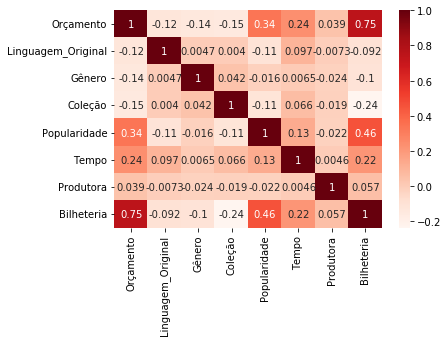

In [67]:
#Revenue = Receita de bilheteria // Exatamente o que precisamos prever no trabalho
#Usando gráfico do seaborn para visualizar a correlação dos dados de treino, notando que budget(orçamento dos filmes) influencia mais no revenue
treino_sns = treino.drop(columns=['id'])
sns.heatmap(treino_sns.corr(), cmap='Reds', annot=True);

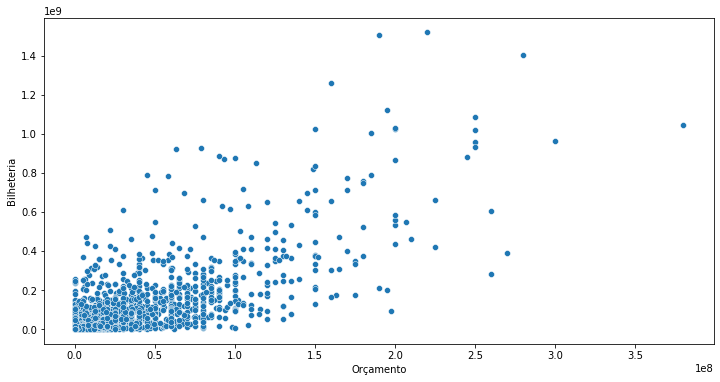

In [68]:
# A correlação do Orçamento com a Bilheteria é a maior e por isso será o foco inical
# O primeiro ponto a ser destacado é que grande parte dos filmes possui uma relação de bilheteria e orçamento muito grande. Em filmes com baixo orçamento
# é esperado uma baixa bilheteria. Contudo, há exceções tanto para pequenas quanto para grandes bilheterias.

fig = sns.scatterplot(data=treino, x='Orçamento', y='Bilheteria')
fig.figure.set_size_inches(12, 6)
plt.show(fig)

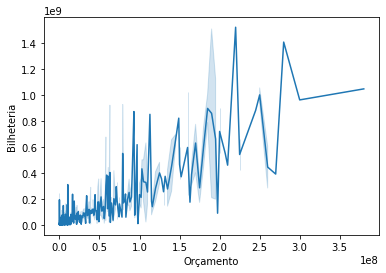

In [69]:
# Nesse gráfico de linhas é possível ver essa tendência de bilheteria X orçamento e também como pode bastante variável por causa das exceções
fig_linha = sns.lineplot(data=treino, x='Orçamento', y='Bilheteria')
plt.show(fig_linha)

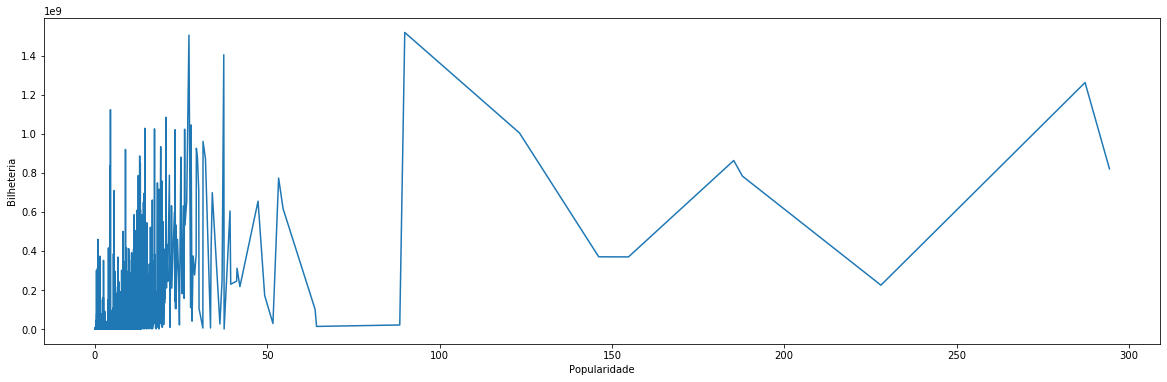

In [70]:
# Embora seja menor e mais variável a influência da popularidade na bilheteria, ainda assim, é possível dizermos que existe uma tendência de maior bilheteria
# conforme a popularidade do filme cresce
fig_pop = sns.lineplot(x="Popularidade",y="Bilheteria",data=treino);
fig_pop.figure.set_size_inches(20, 6)

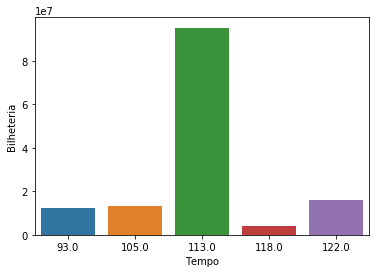

In [71]:
#Aqui mostra o gráfico de Tempo x Bilheteria, onde os tempos que tende a mais ou menos o meio do gráfico são mais valorizados, nem muito, nem pouco
sns.barplot(x="Tempo",y="Bilheteria",data=treino[:5]);

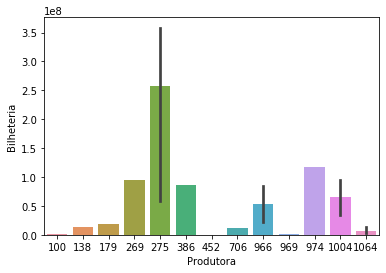

In [72]:
#Aqui um exemplo do por que usar a Produtora como parâmetro para treinar e prever, dependendo de quem fez o filme, há uma tendência a bilheterias maioras
sns.barplot(x="Produtora",y="Bilheteria",data=treino[:20]);

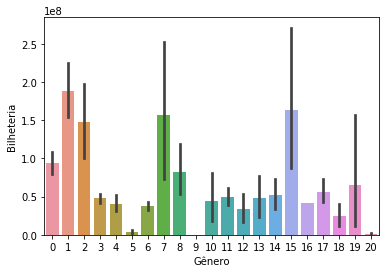

In [73]:
#A mesma coisa serve para os gêneros, o público tem uma preferência maior dependendo do gênero
sns.barplot(x="Gênero",y="Bilheteria",data=treino);

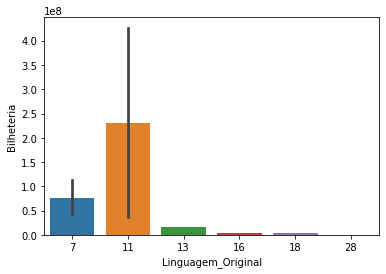

In [74]:
#mostrando também como um lingua afeta mais do que outras, mesmo com uma correlação ruim
sns.barplot(x="Linguagem_Original",y="Bilheteria",data=treino[:50]);

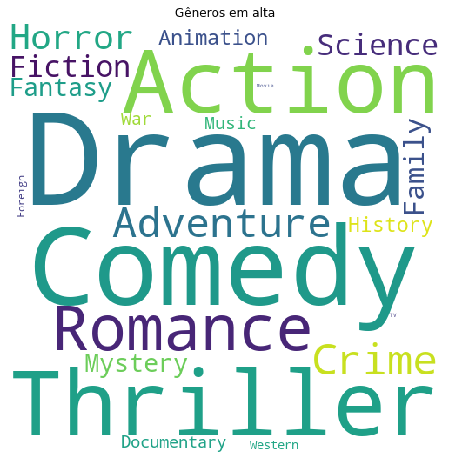

In [75]:
#Visualizando os gêneros que mais aparecem
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in listagenero for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=500, height=500).generate(text)
plt.imshow(wordcloud)
plt.title('Gêneros em alta')
plt.axis("off")
plt.show()

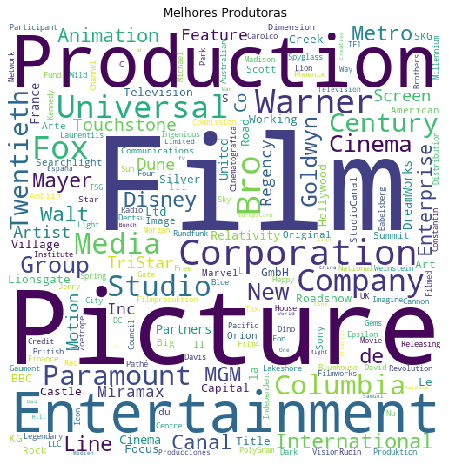

In [76]:
#Visualizando as produtoras que mais aparecem
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in listaprod for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=500, height=500).generate(text)
plt.imshow(wordcloud)
plt.title('Melhores Produtoras')
plt.axis("off")
plt.show()

### Treinamento

In [77]:
#Inserindo as colunas que serão usadas no treino
x = treino[['Orçamento', 'Popularidade', 'Tempo', 'Gênero','Produtora','Coleção','Linguagem_Original']]
y = treino['Bilheteria']

In [78]:
#Testando o modelo do random forest regressor e vendo a discrepância no erro com relação ao y_teste
np.random.seed(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=4)
modelo = RandomForestRegressor(n_estimators=500)
modelo.fit(x_treino,y_treino)
pred = modelo.predict(x_teste)
print(mean_absolute_error(pred,y_teste))
print(mean_squared_error(pred,y_teste))

38427105.03863733
4940404132168685.0


In [79]:
#Faznedo o predict do modelo no dataframe real de teste para passar o resultado ao submission
testeoficial = teste[['Orçamento', 'Popularidade', 'Tempo', 'Gênero','Produtora','Coleção','Linguagem_Original']] 
bilheteriapred = modelo.predict(testeoficial)

In [80]:
#Finalizando com os dados em um arquivo csv para entrega no kaggle
submission = pd.DataFrame({'id':teste.id,'revenue':bilheteriapred})
submission.to_csv('submission.csv', index=False)